In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df.drop(["area_type","availability","society","balcony"],axis = "columns")

In [6]:
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))
df3.head()

C:\Users\Stunning sathvik\AppData\Local\Temp\ipykernel_25844\4018778724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))


location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [12]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
is_float("1440")

True

In [15]:
is_float("1440-1660")

False

In [17]:
df3[df3['total_sqft'].apply(is_float)].head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [19]:
df3[~df3['total_sqft'].apply(is_float)].head(20)

location       size      total_sqft  bath    price  bhk
30                Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122                  Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137      8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165                Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188                KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410                 Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549             Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648                 Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661               Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672            Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4
772   Banashankari Stage VI      2 BHK     1160 - 1195   2.0   59.935    2
775            Basavanagara      1 BHK   1000Sq. Meter   2.0   93.000    1
850       Bannerghatta Road      2 BHK     1115 - 1130   2.0   58.935    2
872       Singapura Village      2 BHK   1100Sq. Yards   2.0   45.000    2
886              Chandapura      1 BHK       520 - 645   1.0   15.135    1
927             Thanisandra      2 BHK     1000 - 1285   2.0   43.415    2
959             Kammasandra      1 BHK       650 - 665   1.0   18.410    1
990                Sarjapur      1 BHK       633 - 666   1.0   17.535    1
1019         Marathi Layout  1 Bedroom       5.31Acres   1.0  110.000    1
1086             Narasapura  2 Bedroom         30Acres   2.0   29.500    2

In [20]:
def convert(x):
    tokens= x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [21]:
convert("2100 - 2850")

2475.0

In [25]:
convert("5.31Acres")

In [26]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert)

In [27]:
df4.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [33]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [34]:
df4.loc[872]

location      Singapura Village
size                      2 BHK
total_sqft                  NaN
bath                        2.0
price                      45.0
bhk                           2
Name: 872, dtype: object

In [35]:
df5 =df4.copy()

In [37]:
df5.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [39]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [40]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1304,), dtype=object)

In [41]:
len(df5.location.unique())

1304

In [44]:
df5['location'] = df5['location'].apply(lambda x: x.strip())
loc_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [45]:
loc_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [51]:
len(loc_stats[loc_stats<=10])

1052

In [52]:
loc_stats_less_than_10 = loc_stats[loc_stats<=10]
loc_stats_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [54]:
df5['location'] = df5['location'].apply(lambda x: "other" if x in loc_stats_less_than_10 else x)
df5.head(20)

location       size  total_sqft  bath   price  bhk  \
0   Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1           Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3         Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                   Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                 Whitefield      2 BHK      1170.0   2.0   38.00    2   
6           Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7               Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8               Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                      other  6 Bedroom      1020.0   6.0  370.00    6   
10                Whitefield      3 BHK      1800.0   2.0   70.00    3   
11                Whitefield  4 Bedroom      2785.0   5.0  295.00    4   
12        7th Phase JP Nagar      2 BHK      1000.0   2.0   38.00    2   
13                 Gottigere      2 BHK      1100.0   2.0   40.00    2   
14                  Sarjapur  3 Bedroom      2250.0   3.0  148.00    3   
15               Mysore Road      2 BHK      1175.0   2.0   73.50    2   
16             Bisuvanahalli      3 BHK      1180.0   3.0   48.00    3   
17     Raja Rajeshwari Nagar      3 BHK      1540.0   3.0   60.00    3   
18                     other      3 BHK      2770.0   4.0  290.00    3   
19                     other      2 BHK      1100.0   2.0   48.00    2   

    price_per_sqft  
0      3699.810606  
1      4615.384615  
2      4305.555556  
3      6245.890861  
4      4250.000000  
5      3247.863248  
6      7467.057101  
7     18181.818182  
8      4828.244275  
9     36274.509804  
10     3888.888889  
11    10592.459605  
12     3800.000000  
13     3636.363636  
14     6577.777778  
15     6255.319149  
16     4067.796610  
17     3896.103896  
18    10469.314079  
19     4363.636364

In [57]:
df6 = df5[~(df5['total_sqft']/df5['bhk']<300)]
df6.shape

(12502, 7)

In [58]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [59]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [65]:
for key, subdf in  df6.groupby('location'):
    print(subdf)
    

                  location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_per_sqft  
210      15017.543860  
848      11901.840491  
2152     12533.333333  
2355     18750.000000  
4991      6000.000000  
7138     10833.333333  
7358     11983.805668  
7383     15018.181818  
85

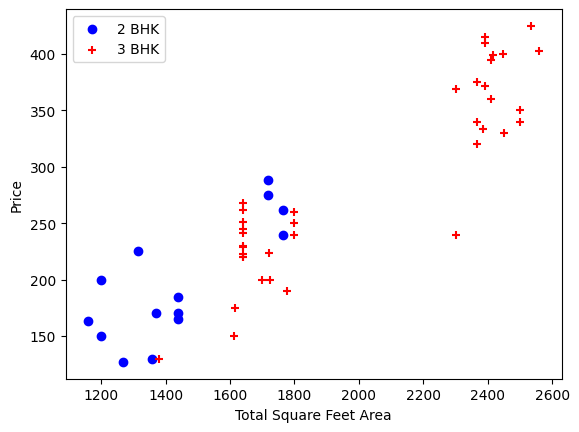

In [67]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='red',label='3 BHK')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

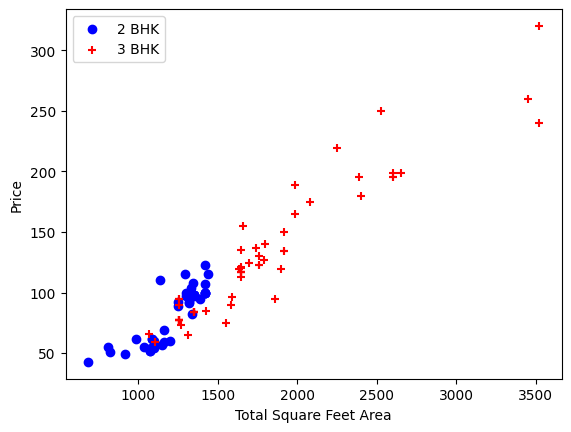

In [68]:
plot_scatter_chart(df7,"Hebbal")

In [69]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

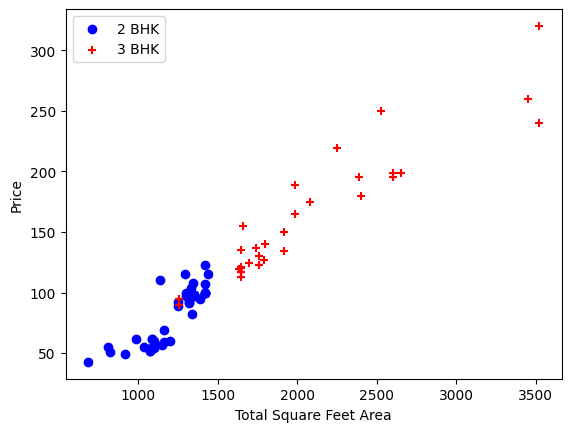

In [70]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'count')

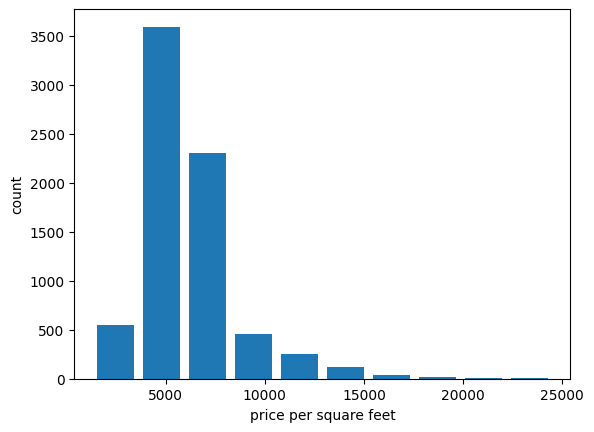

In [71]:
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [72]:
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8411          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

In [73]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [74]:
df8[df8.bath>=df8.bhk+2]

location       size  total_sqft  bath  price  bhk  \
36     2nd Stage Nagarbhavi  6 Bedroom      3000.0   8.0  451.0    6   
37     2nd Stage Nagarbhavi  6 Bedroom      2400.0   8.0  450.0    6   
530                 Arekere      4 BHK      2710.0   6.0  142.0    4   
580           BTM 2nd Stage  3 Bedroom      1260.0   5.0  185.0    3   
813            Bannerghatta      4 BHK      3012.0   6.0  250.0    4   
...                     ...        ...         ...   ...    ...  ...   
9915                  other      4 BHK      6652.0   6.0  510.0    4   
10036                 other      2 BHK       600.0   4.0   70.0    2   
10089                 other  3 Bedroom      5656.0   5.0  499.0    3   
10202                 other      4 BHK      6652.0   6.0  660.0    4   
10209                 other  4 Bedroom      6688.0   6.0  700.0    4   

       price_per_sqft  
36       15033.333333  
37       18750.000000  
530       5239.852399  
580      14682.539683  
813       8300.132802  
...               ...  
9915      7666.867108  
10036    11666.666667  
10089     8822.489392  
10202     9921.828022  
10209    10466.507177  

[78 rows x 7 columns]

In [75]:
df10 = df9.drop(['size', 'price_per_sqft'],axis = "columns")

In [76]:
df10.head()

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0  148.0    2

In [77]:
df10.shape

(7251, 5)

In [80]:
dummies = pd.get_dummies(df10.location)

In [81]:
dummies.head()

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                 True               False                      False   
1                 True               False                      False   
2                 True               False                      False   
3                 True               False                      False   
4                 True               False                      False   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                 False                 False               False   
1                 False                 False               False   
2                 False                 False               False   
3                 False                 False               False   
4                 False                 False               False   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0               False               False               False   
1               False               False               False   
2               False               False               False   
3               False               False               False   
4               False               False               False   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0               False  ...                 False               False   
1               False  ...                 False               False   
2               False  ...                 False               False   
3               False  ...                 False               False   
4               False  ...                 False               False   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0        False       False           False      False               False   
1        False       False           False      False               False   
2        False       False           False      False               False   
3        False       False           False      False               False   
4        False       False           False      False               False   

   Yelenahalli  Yeshwanthpur  other  
0        False         False  False  
1        False         False  False  
2        False         False  False  
3        False         False  False  
4        False         False  False  

[5 rows x 242 columns]

In [82]:
df11 = pd.concat([df10,dummies.drop('other',axis = "columns" )],axis= "columns")
df11.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                 True   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                 True   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                 True   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                 True   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                 True   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0               False                      False                 False   
1               False                      False                 False   
2               False                      False                 False   
3               False                      False                 False   
4               False                      False                 False   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                 False  ...        False                 False   
1                 False  ...        False                 False   
2                 False  ...        False                 False   
3                 False  ...        False                 False   
4                 False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0               False        False       False           False      False   
1               False        False       False           False      False   
2               False        False       False           False      False   
3               False        False       False           False      False   
4               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               False        False         False  
1               False        False         False  
2               False        False         False  
3               False        False         False  
4               False        False         False  

[5 rows x 246 columns]

In [83]:
df12 = df11.drop("location", axis = "columns")

In [84]:
df12.head()

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                 True               False   
1      1630.0   3.0  194.0    3                 True               False   
2      1875.0   2.0  235.0    3                 True               False   
3      1200.0   2.0  130.0    3                 True               False   
4      1235.0   2.0  148.0    2                 True               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                      False                 False                 False   
1                      False                 False                 False   
2                      False                 False                 False   
3                      False                 False                 False   
4                      False                 False                 False   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0               False  ...        False                 False   
1               False  ...        False                 False   
2               False  ...        False                 False   
3               False  ...        False                 False   
4               False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0               False        False       False           False      False   
1               False        False       False           False      False   
2               False        False       False           False      False   
3               False        False       False           False      False   
4               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               False        False         False  
1               False        False         False  
2               False        False         False  
3               False        False         False  
4               False        False         False  

[5 rows x 245 columns]

In [87]:
X = df12.drop("price", axis = "columns")

In [88]:
X.head()

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                 True               False   
1      1630.0   3.0    3                 True               False   
2      1875.0   2.0    3                 True               False   
3      1200.0   2.0    3                 True               False   
4      1235.0   2.0    2                 True               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                      False                 False                 False   
1                      False                 False                 False   
2                      False                 False                 False   
3                      False                 False                 False   
4                      False                 False                 False   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0               False               False  ...        False   
1               False               False  ...        False   
2               False               False  ...        False   
3               False               False  ...        False   
4               False               False  ...        False   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                 False               False        False       False   
1                 False               False        False       False   
2                 False               False        False       False   
3                 False               False        False       False   
4                 False               False        False       False   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0           False      False               False        False         False  
1           False      False               False        False         False  
2           False      False               False        False         False  
3           False      False               False        False         False  
4           False      False               False        False         False  

[5 rows x 244 columns]

In [89]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

In [91]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
model = le.fit(X_train,y_train)
model.score(X_test,y_test)

0.8452277697874226

In [92]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [96]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Python312\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 98, in validate_pa

model  best_score  \
0  linear_regression    0.818354   
1              lasso    0.687444   
2      decision_tree    0.736231   

                                         best_params  
0                                                 {}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'ran...

In [104]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [105]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(83.4990467714689)

In [112]:
loc_index = np.where(X.columns=='1st Phase JP Nagar')

In [113]:
loc_index

(array([4]),)

In [114]:
x = np.zeros(len(X.columns))
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [115]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(81.72616900721783)

In [116]:
import pickle
with open ("bengaluru_house_prices_model.pickle", "wb") as f:
    pickle.dump(model,f)


In [120]:
import json
columns = {
    "json_columns" : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))